# K-means & Hierarchical clustering

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES: Amount of purchases made from account 

ONEOFF_PURCHASES: Maximum purchase amount done in one-go

 INSTALLMENTS_PURCHASES: Amount of purchase done in installment

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use k-means clustering. 

5. Try different k values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: search for another validation metric



# loading the dataset

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering,KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
dfCC=pd.read_csv("CC GENERAL.csv",sep=",")
dfCC

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

# data preprocessing and visualisation

In [46]:
dfCC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [47]:
dfCC["MINIMUM_PAYMENTS"].isnull().sum()

313

In [48]:
dfCC.fillna(0,inplace=True)
dfCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

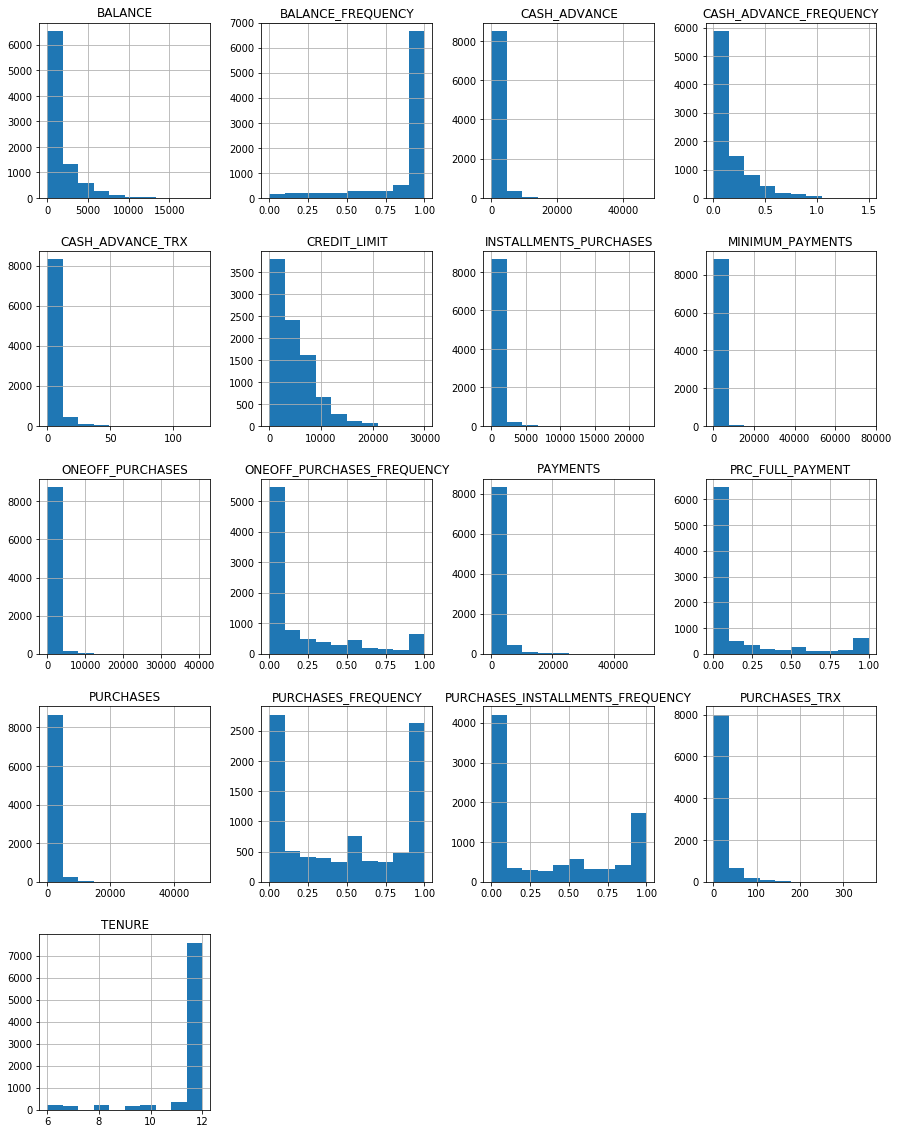

In [49]:

dfCC.hist(figsize = (15,20));


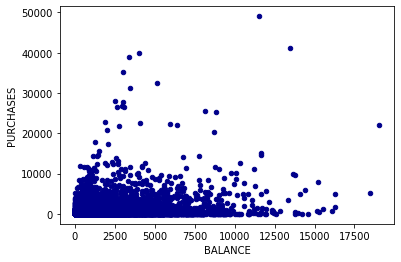

In [50]:
dfCC.plot.scatter(x='BALANCE',y='PURCHASES',c='DarkBlue')

In [51]:
dfCC=dfCC.drop('CUST_ID', axis = 1)
dfCC

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000          0.000000          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322          0.000000          0.000000       6  
8947    81

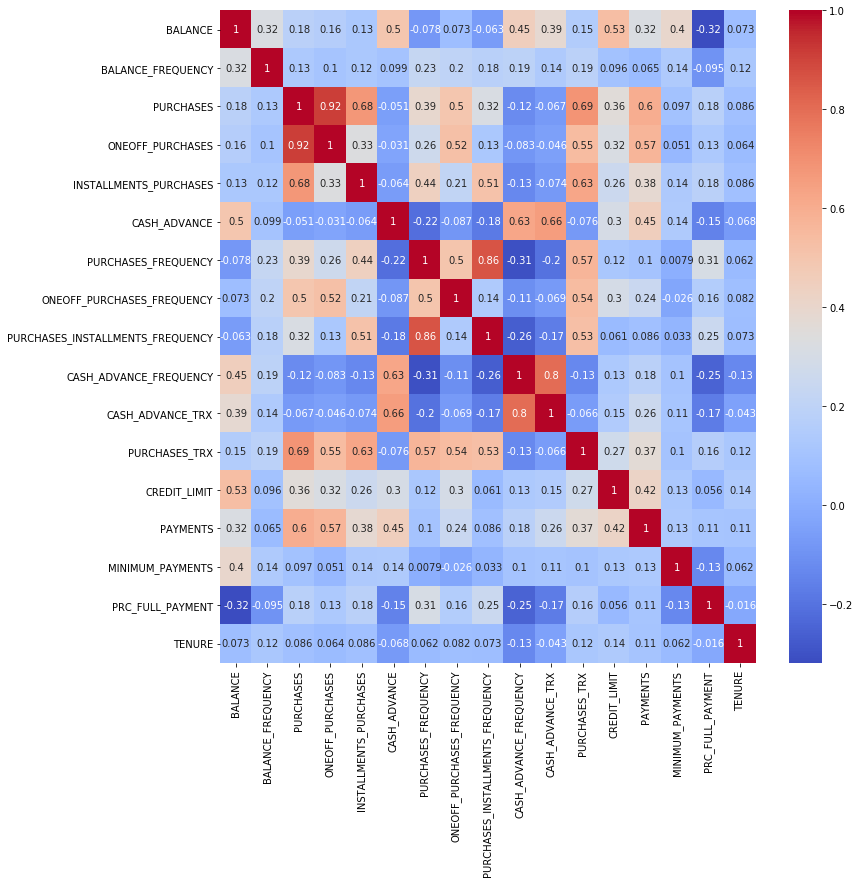

In [52]:
plt.figure(figsize = (12, 12))
sns.heatmap(dfCC.corr(), annot=True, cmap='coolwarm', 
            xticklabels=dfCC.columns,
            yticklabels=dfCC.columns)

# Data standardisation 

In [53]:
# Standardize data
scaler = StandardScaler() 
scal_df = scaler.fit_transform(dfCC) 
  
# Normalizing the Data 
norm_df = normalize(scal_df) 
  
# Converting the numpy array into a pandas DataFrame 
norm_df = pd.DataFrame(norm_df) 

norm_df.rename(columns={0:'BALANCE',
                          1:'BALANCE_FREQUENCY',
                          2:'PURCHASES',
                          3:'ONEOFF_PURCHASES',
                           4:'INSTALLMENTS_PURCHASES',
                           5:'CASH_ADVANCE',
                            6:'PURCHASES_FREQUENCY',
                            7: "ONEOFF_PURCHASES_FREQUENCY",
                            8:'PURCHASES_INSTALLMENTS_FREQUENCY',
                            9:'CASH_ADVANCE_FREQUENCY',
                            10:'CASH_ADVANCE_TRX',
                            11: 'PURCHASES_TRX',
                            12: 'CREDIT_LIMIT',
                            13:'PAYMENTS',
                            14:'MINIMUM_PAYMENTS',
                            15:'PRC_FULL_PAYMENT',
                            16:'TENURE'
                       }, inplace=True)
norm_df


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.312186          -0.106381  -0.181215         -0.152229   
1     0.219903           0.037535  -0.131209         -0.099739   
2     0.126694           0.146797  -0.030507          0.030853   
3     0.020362          -0.421735   0.096235          0.226507   
4    -0.151696           0.219054  -0.195368         -0.146841   
...        ...                ...        ...               ...   
8945 -0.146922           0.103148  -0.066357         -0.071064   
8946 -0.151121           0.105457  -0.066996         -0.072654   
8947 -0.157008          -0.039332  -0.085240         -0.075691   
8948 -0.154352          -0.038419  -0.097261         -0.073934   
8949 -0.115229          -0.178915   0.008482          0.060723   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.148878     -0.199079            -0.343960   
1                  -0.127024      0.728094            -0.341401   
2                  -0.128803     -0.132262             0.359806   
3                  -0.188515     -0.152882            -0.420562   
4                  -0.192202     -0.197364            -0.428788   
...                      ...           ...                  ...   
8945               -0.026409     -0.092934             0.252819   
8946               -0.025001     -0.095015             0.258478   
8947               -0.062534     -0.098986             0.181220   
8948               -0.094159     -0.093077            -0.253070   
8949               -0.091482     -0.081748             0.088410   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.289442                         -0.301662   
1                      -0.189641                         -0.256239   
2                       0.757513                         -0.259827   
3                      -0.165599                         -0.380282   
4                      -0.168838                         -0.387720   
...                          ...                               ...   
8945                   -0.135118                          0.234898   
8946                   -0.138142                          0.240157   
8947                   -0.143916                          0.161264   
8948                   -0.140575                         -0.189942   
8949                    0.313157                         -0.184543   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.288029         -0.203039      -0.218078     -0.409521   
1                   0.160385          0.030758      -0.165368      0.192451   
2                  -0.191358         -0.134893      -0.030890      0.234081   
3                  -0.107372         -0.136659      -0.228736      0.342599   
4                  -0.285548         -0.201290      -0.233210     -0.382754   
...                      ...               ...            ...           ...   
8945               -0.134458         -0.094783      -0.069764     -0.191173   
8946               -0.137468         -0.096905      -0.071326     -0.195453   
8947               -0.143213         -0.100955      -0.082838     -0.203621   
8948                0.032630         -0.037905      -0.122582     -0.227357   
8949                0.199315         -0.036828       0.067121     -0.182179   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.225604         -0.126799         -0.224142  0.153826  
1     0.228756          0.028514          0.065451  0.100786  
2    -0.108750         -0.025073         -0.148913  0.102197  
3    -0.248279         -0.148064         -0.217948  0.149575  
4    -0.154060         -0.106650         -0.222211  0.152501  
...        ...               ...               ...       ...  
8945 -0.096803         -0.066917          0.235718 -0.820821  
8946 -0.102467         -0.072675         -0.106977 -0.839195  
8947 -0.121004         -0.068230          0.069810 -

# Hierarchical Clustering 

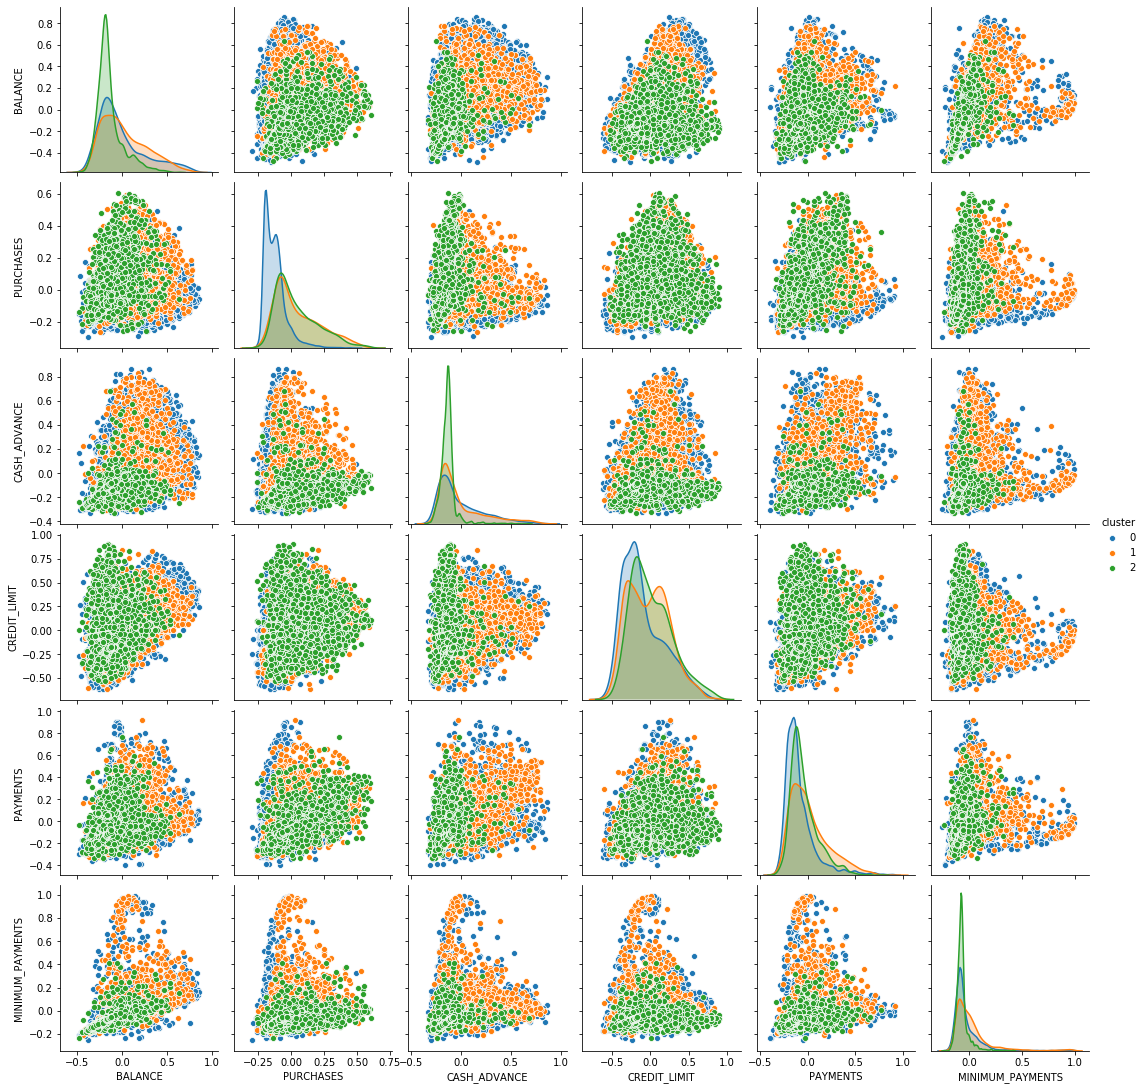

In [54]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(norm_df)
clust_labels
best_cols= ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
norm_df['cluster'] = clust_labels
best_cols.append('cluster')
# make a Seaborn pairplot
sns.pairplot(norm_df[best_cols], hue='cluster')

In [55]:
agglom=pd.DataFrame(clust_labels)
agglom

0
0     0
1     0
2     2
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]

# visualization

In [56]:
# plt.figure(figsize =(20, 20)) 
# plt.title('Visualising the data') 
# Dendrogram = shc.dendrogram((shc.linkage(norm_df, method ='complete'))) 
enlaces = linkage(norm_df, method = "complete")
enlaces

array([[5.21900000e+03, 8.44200000e+03, 1.08457026e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 1.15776809e-03, 2.00000000e+00],
       [4.62900000e+03, 7.91900000e+03, 2.28723915e-03, 2.00000000e+00],
       ...,
       [1.78920000e+04, 1.78930000e+04, 1.93217616e+00, 4.64600000e+03],
       [1.78940000e+04, 1.78950000e+04, 2.19049003e+00, 4.30400000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.80192257e+00, 8.95000000e+03]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [80.0, 80.0, 111.875, 111.875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [95.9375, 95.9375, 170.0, 170.0],
  [60.0, 60.0, 132.96875, 132.96875],
  [40.0, 40.0, 96.484375, 96.484375],
  [12.5, 12.5, 68.2421875, 68.2421875],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [275.0, 275.0, 300.0, 300.0],
  [252.5, 252.5, 287.5, 287.5],
  [222.5, 222.5, 270.0, 270.0],
  [200.0, 200.0, 246.25, 246.25],
  [335.0, 335.0, 345.0, 

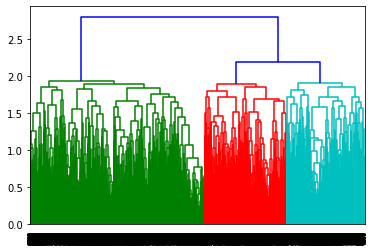

In [57]:
dendrogram(enlaces)

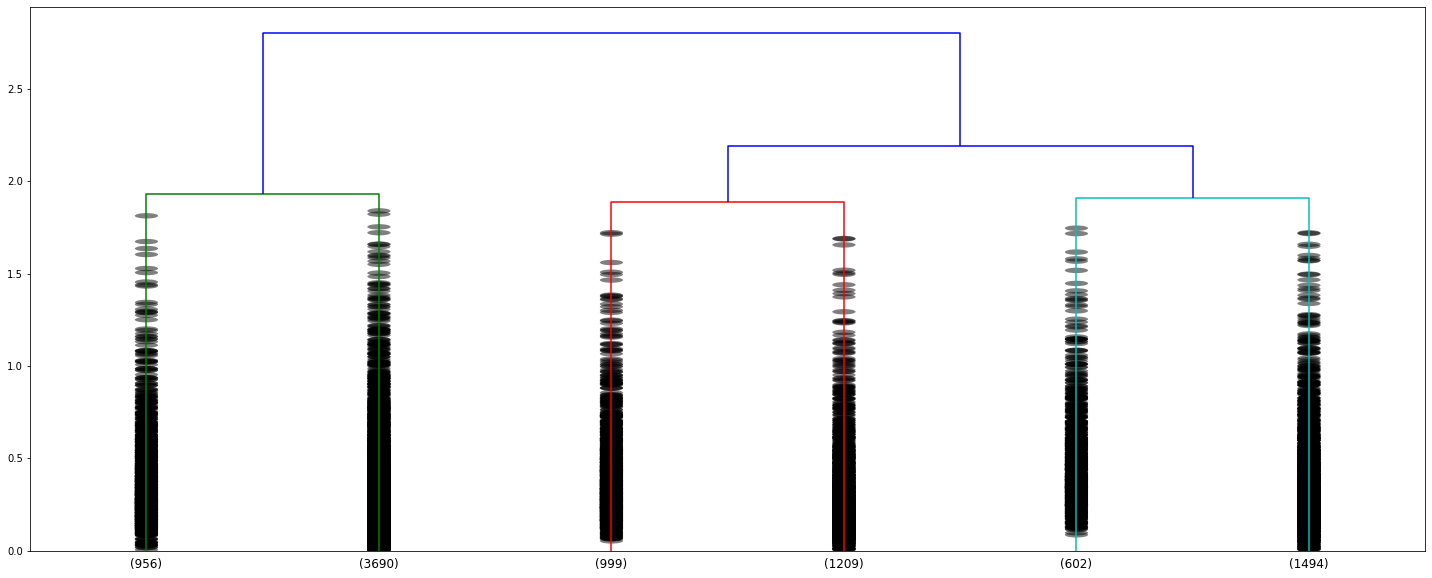

In [58]:
## minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 6, show_leaf_counts= True, show_contracted= True) 


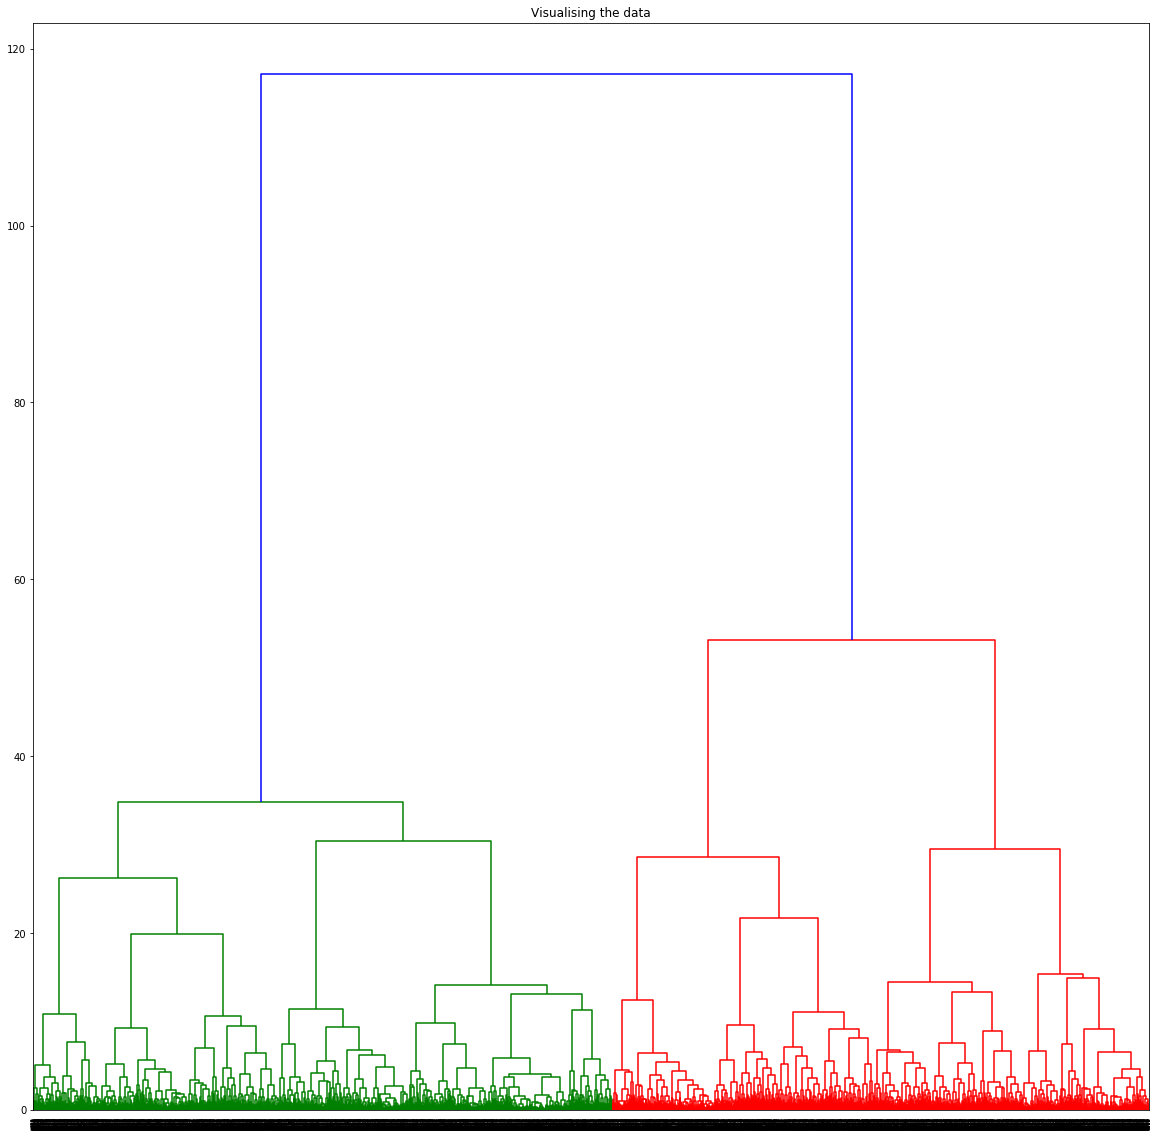

In [59]:
plt.figure(figsize =(20, 20)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(norm_df, method ='ward'))) 

In [60]:
# select best columns
best_cols_3 = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final_3 = pd.DataFrame(norm_df[best_cols_3])



New dataframe with best columns has just been created. Data shape: (8950, 6)


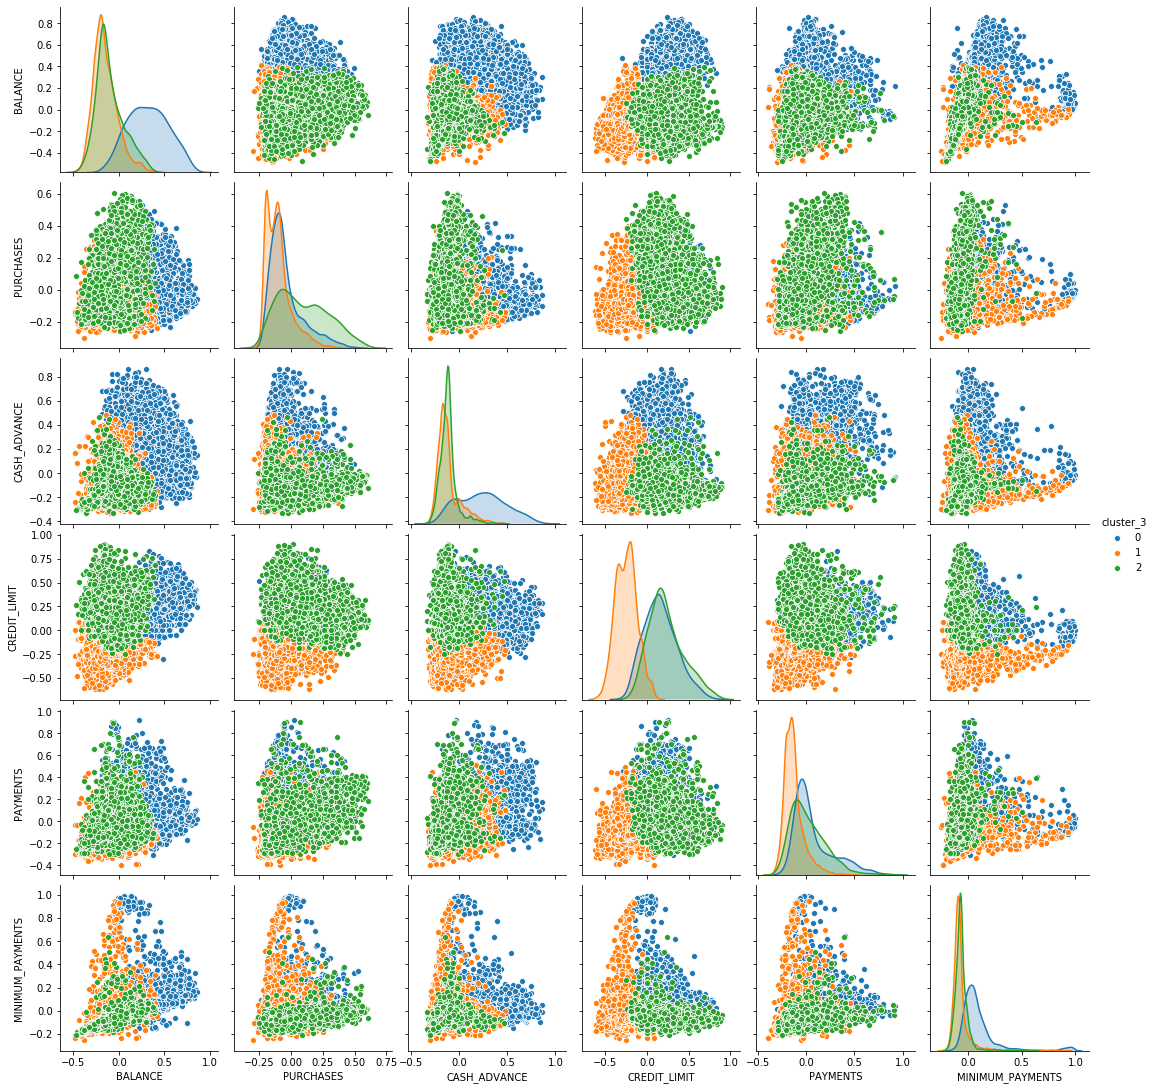

In [61]:
print('New dataframe with best columns has just been created. Data shape: ' + str(data_final_3.shape))
# apply KMeans clustering
alg_3 = KMeans(n_clusters = 3)
label_3 = alg_3.fit_predict(data_final_3)

# create a 'cluster' column
data_final_3['cluster_3'] = label_3
best_cols_3.append('cluster_3')

# make a Seaborn pairplot
sns.pairplot(data_final_3[best_cols_3], hue='cluster_3')

New dataframe with best columns has just been created. Data shape: (8950, 6)


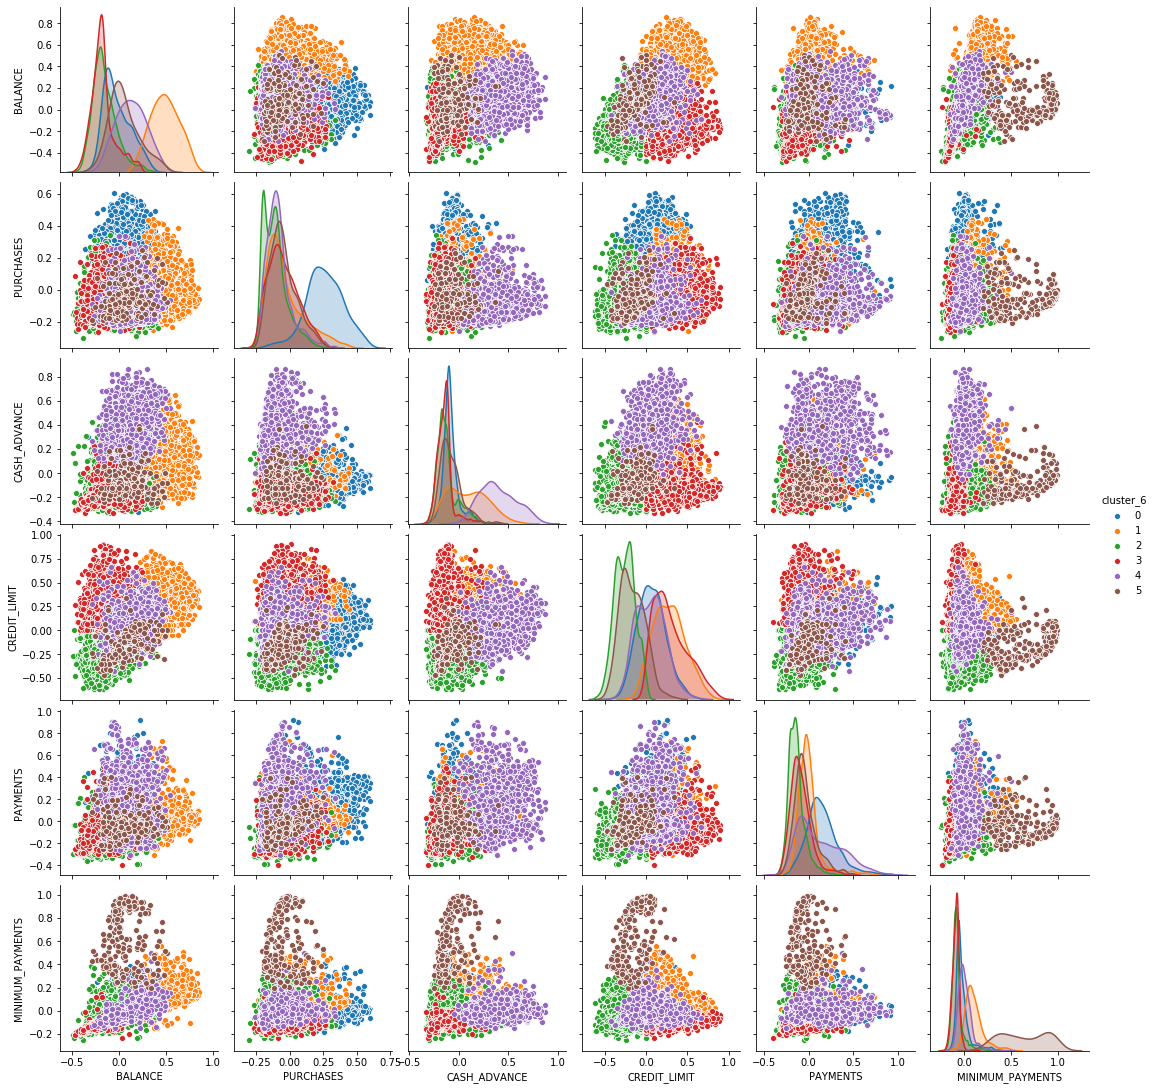

In [62]:
# select best columns
best_cols_6 = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final_6 = pd.DataFrame(norm_df[best_cols_6])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final_6.shape))
# apply KMeans clustering
alg_6 = KMeans(n_clusters = 6)
label_6 = alg_6.fit_predict(data_final_6)

# create a 'cluster' column
data_final_6['cluster_6'] = label_6
best_cols_6.append('cluster_6')

# make a Seaborn pairplot
sns.pairplot(data_final_6[best_cols_6], hue='cluster_6')

New dataframe with best columns has just been created. Data shape: (8950, 6)


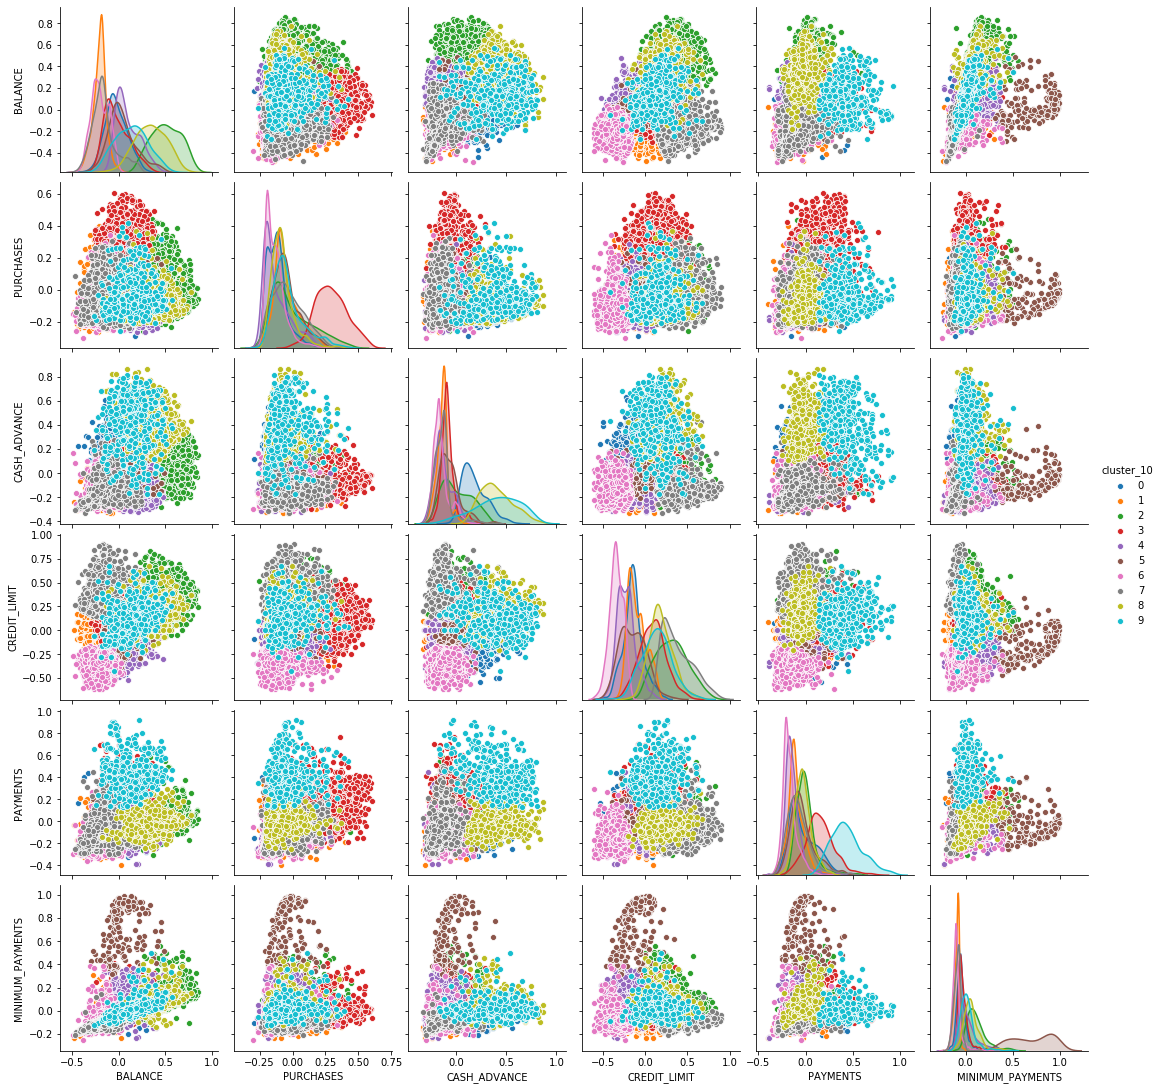

In [63]:

# select best columns
best_cols_10 = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final_10 = pd.DataFrame(norm_df[best_cols_10])
print('New dataframe with best columns has just been created. Data shape: ' + str(data_final_10.shape))
# apply KMeans clustering
alg_10 = KMeans(n_clusters = 10)
label_10 = alg_10.fit_predict(data_final_10)

# create a 'cluster' column
data_final_10['cluster_10'] = label_10
best_cols_10.append('cluster_10')

# make a Seaborn pairplot
sns.pairplot(data_final_10[best_cols_10], hue='cluster_10')

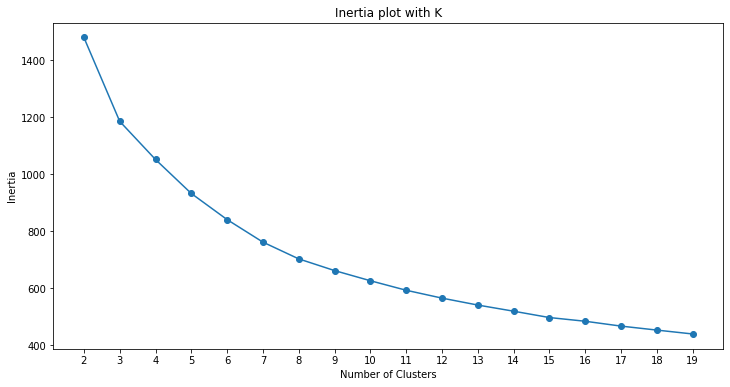

In [64]:

# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final= pd.DataFrame(norm_df[best_cols])
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()
inertia_plot(KMeans, data_final)    

the optimal value of clusters using the elbow method is 6 
we have already plotted these solution above 

# Comparing the two results.
comparing the two methods hierarchiecal clustering and kmeans clustering for n_clusters = 3 I choose to evaluate the payment as a function of purchases
for the hierarchical clustering we found :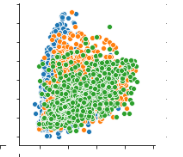
and for the  kmeans clustering we found :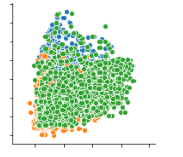

the result seems to be slightly different specially if there is little purchases the kmeans seems to be more generalising than the hierarchicla clustering which gives a more specific results 
but it seems also when execution the algorithms that the kmeans is a lighter  program than the hierarchical one 

# Another validation metric
another used metric is <b> silhouette score</b> which is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). where, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1. 

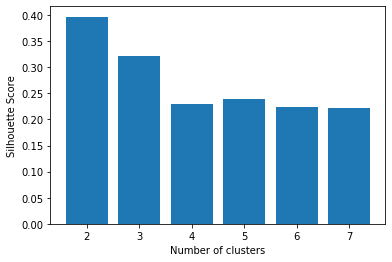

In [65]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(norm_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(norm_df))) 
    # Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
the best score is obtained for number of clusters =2 with almost 0.39 